# Machine Learning Enhanced localization in 5G networks    

# Data preparation

## Data loading

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# load the coverage and cir datasets

df = pd.read_csv('data/5G_cov_cir_C1_interpolated.csv')

## Data splitting

In [ ]:
from sklearn.model_selection import train_test_split
Y = df[['latitude', 'longitude']]

X = df.drop(['latitude', 'longitude'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=100)

# Model building

## Linear regression

### Training the model 

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

### Applying model for prediction

In [89]:
y_lr_train_pred = lr.predict(X_train)
y_lr_test_pred = lr.predict(X_test)

### Performance evaluation

In [90]:
from utils import mean_position_error
# training data performance

y_lr_train_pred = np.array(y_lr_train_pred, dtype=float)
y_lr_test_pred = np.array(y_lr_test_pred, dtype=float)

lr_train_mpe = mean_position_error(y_train, y_lr_train_pred)
lr_test_mpe = mean_position_error(y_test, y_lr_test_pred)

print("Performance evaluation: Linear Regression")
print("Training Mpe:", lr_train_mpe)
print("Test Mpe:", lr_test_mpe)

Performance evaluation: Linear Regression
Training Mpe: 0.1478233291510266
Test Mpe: 0.14242707351778974


## K-NN

### Training the model

In [91]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors = 3)
knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

### Applying the model for prediction

In [92]:
y_knn_train_pred = knn.predict(X_train)
y_knn_test_pred = knn.predict(X_test)

### Performance evaulation

In [93]:
y_knn_train_pred_df = np.array(y_knn_train_pred, dtype=float)
y_knn_test_pred_df = np.array(y_knn_test_pred, dtype=float)

knn_train_mpe = mean_position_error(y_train, y_knn_train_pred)
knn_test_mpe = mean_position_error(y_test, y_knn_test_pred)

print("Performance evaluation: KNN")
print("Training Mpe:", lr_train_mpe)
print("Test Mpe:", lr_test_mpe)

Performance evaluation: KNN
Training Mpe: 0.1478233291510266
Test Mpe: 0.14242707351778974


## Model comparison

<class 'pandas.core.frame.DataFrame'>
    latitude  longitude
0  41.823742  12.467466
1  41.823742  12.467466
2  41.823742  12.467466
3  41.823742  12.467466
4  41.823742  12.467466


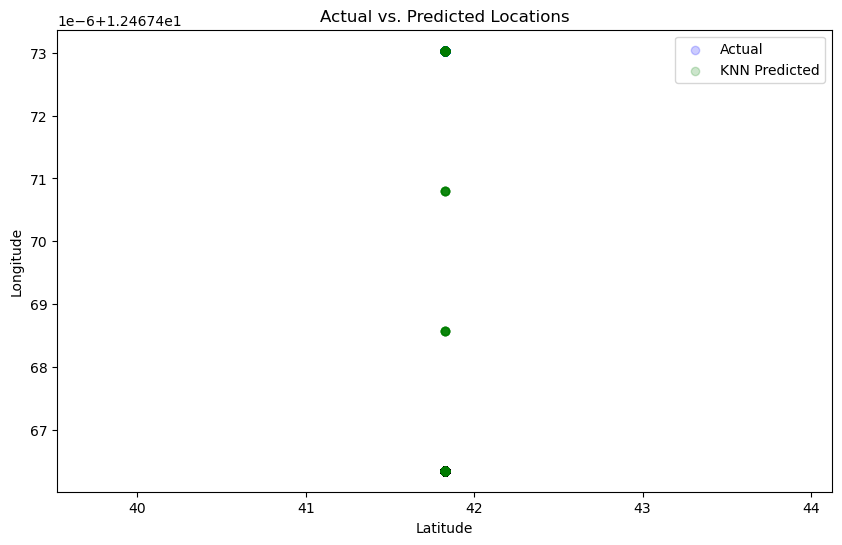

In [100]:
y_knn_train_pred_df = pd.DataFrame(y_knn_train_pred, columns=['latitude', 'longitude'])
y_knn_test_pred_df = pd.DataFrame(y_knn_test_pred, columns=['latitude', 'longitude'])
y_test = pd.DataFrame(y_test, columns=['latitude', 'longitude'])

print(type(y_test))
print(y_test.head())

plt.figure(figsize=(10, 6))

# Actual locations
plt.scatter(y_test['latitude'], y_test['longitude'], color='blue', alpha=0.2, label='Actual')

# Predicted locations - Using DataFrame for K-NN Predictions
plt.scatter(y_knn_test_pred_df['latitude'], y_knn_test_pred_df['longitude'], color='green', alpha=0.2, label='KNN Predicted')

plt.title('Actual vs. Predicted Locations')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.legend()
plt.show()